In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
def load_file(filepath):
	dataframe = pd.read_table(filepath,sep= ",",header=None, )
	return dataframe.values

In [80]:
test = load_file("wisdm-dataset/raw/phone/accel/data_1600_accel_phone.txt")
print("shape of test: ")
print(test.shape)
print(test[:-1])



shape of test: 
(64311, 6)
[[1600 'A' 252207666810782 -0.36476135 8.793503 '1.0550842;']
 [1600 'A' 252207717164786 -0.8797302 9.768784 '1.0169983;']
 [1600 'A' 252207767518790 2.0014954 11.10907 '2.619156;']
 ...
 [1600 'S' 244505711296204 -2.0469208 10.032288 '-1.2299347;']
 [1600 'S' 244505761650208 -1.3935394 9.883896 '-0.47924805;']
 [1600 'S' 244505812004212 -1.2304535 9.315079 '-0.15570068;']]


In [86]:
#load data for 1 person and clean it
def loadAndClean(filepath, filename):
    dataframe = pd.read_table(filepath+filename,sep= ",",header=None,names=["ID","Label","NM","X","Y","Z"], usecols=["ID","Label","NM","X","Y","Z"])
    dataframeclean = []
    dataframeclean = dataframe[(dataframe.Label == "A") | 
                               (dataframe.Label == "B") |
                               (dataframe.Label == "C") |
                               (dataframe.Label == "D") ]
    dataframeclean = dataframeclean.filter(items=["ID","Label","X","Y","Z"])
    for i in range(0,dataframeclean.shape[0]):
        dataframeclean.at[i,"Z"]= float(dataframeclean.at[i,"Z"].replace(";",""))
   
    #print(dataframeclean)
    
    return dataframeclean

ss = "wisdm-dataset/raw/phone/accel/data_1600_accel_phone.txt"
loadAndClean("",ss)

,ID,Label,X,Y,Z
0,1600,A,-0.364761,8.793503,1.055084
1,1600,A,-0.879730,9.768784,1.016998
2,1600,A,2.001495,11.109070,2.619156
3,1600,A,0.450623,12.651642,0.184555
4,1600,A,-2.164352,13.928436,-4.422485
...,...,...,...,...,...
14286,1600,D,4.365356,4.304474,6.787476
14287,1600,D,4.361466,4.303711,6.867676
14288,1600,D,4.322098,4.285400,6.844696
14289,1600,D,4.300400,4.312668,6.874374


In [82]:
filepath = "wisdm-dataset/raw/phone/accel/"
filename = "data_1600_accel_phone.txt"

def loadCleanedGroup(N1,N2):
    ff1 = "data_"+str(N1)+"_accel_phone.txt"
    df = loadAndClean(filepath,ff1)
    for i in range(N1,N2+1):
        ff2 = "data_"+str(i)+"_accel_phone.txt"
        df2 = loadAndClean(filepath,ff2)
        df = pd.concat([df,df2])
        
    #print(df.head())
    return df

df = loadCleanedGroup(1640,1650)
df.to_csv('DataCleanedFull40_50.csv')  

In [83]:
df = pd.read_table("DataCleanedFull40_50.csv",sep=",",header=[0,1,2,3,4])
print(df.shape)#341825 -> 341800 window 50
T = int(341800/50)
df = df.values[:341800]
df = df.reshape(T,50,6)
print(df.shape)
print(df[0])

(341821, 6)
(6836, 50, 6)
[[4 1640 'A' 9.476251 -1.5173253 -0.048931498]
 [5 1640 'A' 10.6398325 -0.96905315 -0.6187515]
 [6 1640 'A' 9.646238 -2.2284033 -0.03696049]
 [7 1640 'A' 11.520899 -2.4893713 -0.056114104]
 [8 1640 'A' 10.366894 -2.2762873 -0.3242647]
 [9 1640 'A' 8.6574335 -1.7806876 -0.2021604]
 [10 1640 'A' 8.578424 -2.319383 -0.21413141]
 [11 1640 'A' 9.244013 -3.2555158 -0.51580083]
 [12 1640 'A' 9.998186 -4.162918 -0.4750994]
 [13 1640 'A' 11.645397 -5.7909756 -0.31947628]
 [14 1640 'A' 13.467384 -5.5587378 -0.9874586]
 [15 1640 'A' 14.721947 -2.6426 -1.4591163]
 [16 1640 'A' 11.865664 -5.819706 -0.13751696]
 [17 1640 'A' 12.555194 -3.7726634 -1.8781016]
 [18 1640 'A' 13.584701 -3.4901476 -2.309058]
 [19 1640 'A' 10.754754 -2.19249 -1.2987047]
 [20 1640 'A' 8.631097 -1.4670471 -1.3202527]
 [21 1640 'A' 8.734048 -1.6681601 -1.7559973]
 [22 1640 'A' 8.746018 -1.6250644 -1.8996494]
 [23 1640 'A' 9.124303 -1.0839748 -2.060061]
 [24 1640 'A' 11.056423 -0.9091981 -1.8254292]
 

In [84]:
def makeFeatures(shapedData):
    lableForSamples=[]

    minX = []
    minY = []
    minZ = []

    maxX = []
    maxY = []
    maxZ = []

    meanX = []
    meanY = []
    meanZ = []

    standX = []
    standY = []
    standZ = []

    varX =[]
    varY = []
    varZ =[]

    corXY =[]
    corXZ =[]
    corYZ =[]


    for i in range(0,len(shapedData)):
        testX = shapedData[i]
        meanLabel = testX[25,2]
        lableForSamples.append(meanLabel)
        
        x = np.min(testX[:,3])
        y = np.min(testX[:,4])
        z = np.min(testX[:,5])
        minX.append(x)
        minY.append(y)
        minZ.append(z)
        
        x = np.max(testX[:,3])
        y = np.max(testX[:,4])
        z = np.max(testX[:,5])
        maxX.append(x)
        maxY.append(y)
        maxZ.append(z)
        
        x = np.mean(testX[:,3])
        y = np.mean(testX[:,4])
        z = np.mean(testX[:,5])
        meanX.append(x)
        meanY.append(y)
        meanZ.append(z)
        
        x = np.std(testX[:,3])
        y = np.std(testX[:,4])
        z = np.std(testX[:,5])
        standX.append(x)
        standY.append(y)
        standZ.append(z)
        
        x = np.var(testX[:,3])
        y = np.var(testX[:,4])
        z = np.var(testX[:,5])
        varX.append(x)
        varY.append(y)
        varZ.append(z)
        
        x = np.correlate(testX[:,3],testX[:,4])
        y = np.correlate(testX[:,4],testX[:,5])
        z = np.correlate(testX[:,5],testX[:,3])
        corXY.append(x)
        corYZ.append(y)
        corXZ.append(z)

    #lableForSamples = np.array(lableForSamples)
    #minX = np.array(minX)
    #minY = np.array(minY)
    #minZ = np.array(minZ)
    #featureV= np.array([lableForSamples,minX,minY,minZ])
    #print(len(lableForSamples),len(minX),len(minY),len(minZ))    
    featureV = {"Labels": lableForSamples, "minX": minX, "minY": minY, "minZ":minZ,
                "maxX": maxX, "maxY":maxY, "maxZ":maxZ,
                "meanX": meanX,"meanY":meanY, "meanZ":meanZ,
                "stdX":standX, "stdY":standY, "stdZ":standZ,
                "varX":varX, "varY":varY, "varZ":varZ,
                "corXY":corXY, "corYZ":corYZ, "corXZ":corXZ}    
    dataFullFeatures = pd.DataFrame(featureV)  
        
    #print(testX.shape)
    #print(lableForSamples)

    plt.figure()
    plt.plot(testX[:,3])
    plt.show
    
    return dataFullFeatures

     Labels      minX      minY      minZ       maxX      maxY      maxZ  \
0         A  7.467515 -5.819706 -2.309058  14.721947 -0.909198  0.753126   
1         A  6.497863 -5.704784 -2.426374  14.434642 -0.911592  0.619051   
2         A  7.338228 -5.429451 -2.321029  15.148114 -0.413598  1.054795   
3         A  7.747637 -5.731120 -2.675371  16.024391 -0.234033  0.803404   
4         A  7.405266 -6.576273 -2.665794  15.253459  0.826598  2.718766   
...     ...       ...       ...       ...        ...       ...       ...   
6831      D -5.350474 -6.227051 -4.608018  -5.295388 -6.171966 -4.533772   
6832      D -5.350474 -6.239026 -4.605623  -5.292993 -6.155201 -4.543352   
6833      D -5.364844 -6.239026 -4.586462  -5.290598 -6.176755 -4.502637   
6834      D -5.355264 -6.229446 -4.600833  -5.307364 -6.169570 -4.540958   
6835      D -5.364844 -6.227051 -4.612808  -5.302574 -6.159990 -4.517007   

          meanX     meanY     meanZ      stdX      stdY      stdZ      varX  \
0     10

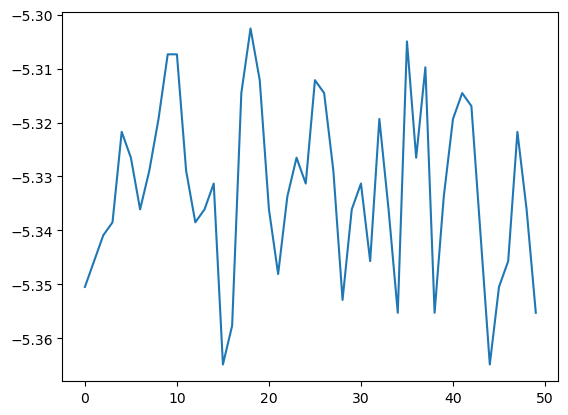

In [85]:
dff = makeFeatures(df)
dff.to_csv("featuresF.csv")
print(dff)